In [35]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


In [36]:
dataset = '../datasets/winequality-white.xlsx'
df = pd.read_excel(dataset, header=1)

In [37]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [38]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
df.index

RangeIndex(start=0, stop=4898, step=1)

In [40]:
df.shape

(4898, 12)

In [41]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Missing values

In [42]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Outliers

<Axes: >

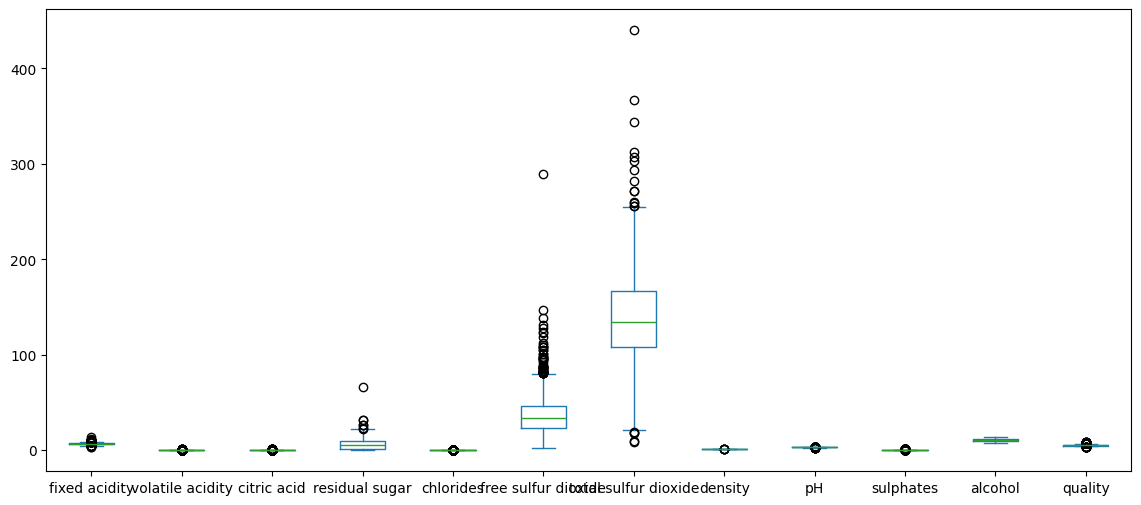

In [43]:
df.plot(kind='box', figsize=(14,6))

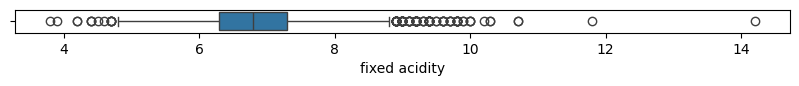

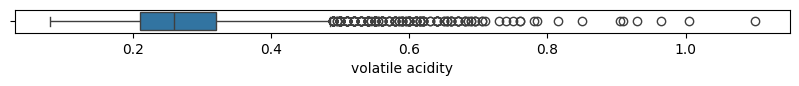

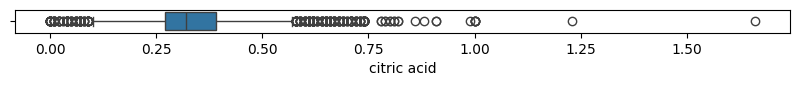

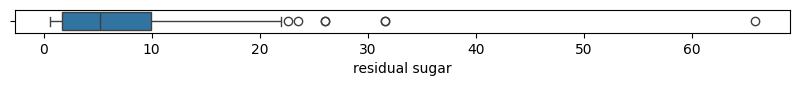

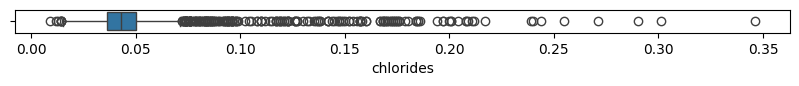

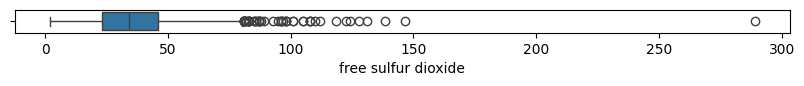

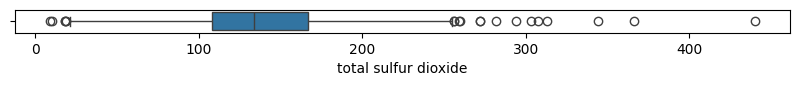

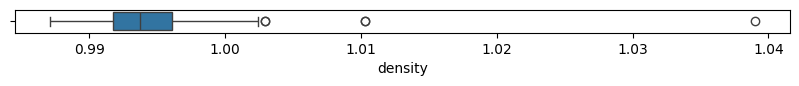

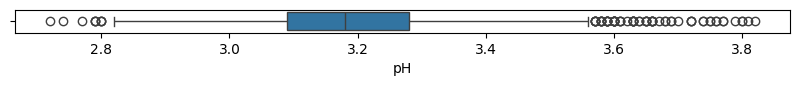

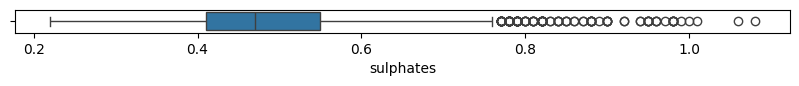

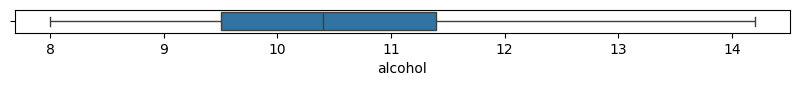

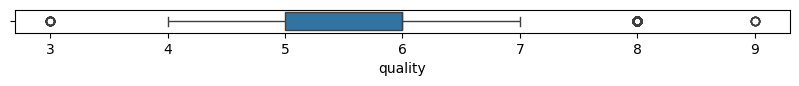

In [44]:
for column in df:
    plt.figure(figsize=(10,0.3))
    sbn.boxplot(df[column], orient='h')
    

In [45]:
print('Outliers')
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(column + ':',IQR)

Outliers
fixed acidity: 1.0
volatile acidity: 0.11000000000000001
citric acid: 0.12
residual sugar: 8.200000000000001
chlorides: 0.014000000000000005
free sulfur dioxide: 23.0
total sulfur dioxide: 59.0
density: 0.004377499999999923
pH: 0.18999999999999995
sulphates: 0.14000000000000007
alcohol: 1.9000000000000004
quality: 1.0


In [46]:
print('Upper and lower fence')
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fence = Q1 - (1.5 * IQR)
    Lower_Fence = Q3 - (1.5 * IQR)
    print(column,Upper_Fence,Lower_Fence)

Upper and lower fence
fixed acidity 4.8 5.8
volatile acidity 0.04499999999999996 0.15499999999999997
citric acid 0.09000000000000002 0.21000000000000002
residual sugar -10.600000000000001 -2.4000000000000004
chlorides 0.014999999999999989 0.028999999999999995
free sulfur dioxide -11.5 11.5
total sulfur dioxide 19.5 78.5
density 0.9851562500000002 0.9895337500000001
pH 2.8049999999999997 2.995
sulphates 0.19999999999999987 0.33999999999999997
alcohol 6.6499999999999995 8.55
quality 3.5 4.5


In [47]:
original_shape = df.shape

In [48]:
for column in df:
    Q1 = df[column].quantile(0.25)  # Calculating quantiles for IQR
    Q3 = df[column].quantile(0.75)  # Calculating quantiles for IQR
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    df = df[~((df [column] < Lower_Fence) |(df[column] > Upper_Fence))]

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
